In [1]:
#Normalizando dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

#sklearn ML
from sklearn. metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv('portscan.csv')
display(df)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.100.25.14,10.100.18.12,TCP,60,1065 > 139 [SYN] Seq=0 Win=8 Len=0
1,2,0.100476,10.100.25.14,10.100.18.12,TCP,60,19491 > 135 [SYN] Seq=0 Win=8 Len=0
2,3,0.201152,10.100.25.14,10.100.18.12,TCP,60,7358 > 445 [SYN] Seq=0 Win=8 Len=0
3,4,0.301714,10.100.25.14,10.100.18.12,TCP,60,27524 > 80 [SYN] Seq=0 Win=8 Len=0
4,5,0.403133,10.100.25.14,10.100.18.12,TCP,60,20193 > 22 [SYN] Seq=0 Win=8 Len=0
5,6,0.503604,10.100.25.14,10.100.18.12,TCP,60,1023 > 515 [SYN] Seq=0 Win=8 Len=0
6,7,0.607512,10.100.25.14,10.100.18.12,TCP,60,16748 > 23 [SYN] Seq=0 Win=8 Len=0
7,8,0.707986,10.100.25.14,10.100.18.12,TCP,60,12502 > 21 [SYN] Seq=0 Win=8 Len=0
8,9,0.808340,10.100.25.14,10.100.18.12,TCP,60,30382 > 6000 [SYN] Seq=0 Win=8 Len=0
9,10,0.904949,10.100.25.14,10.100.18.12,TCP,60,27986 > 1025 [SYN] Seq=0 Win=8 Len=0


In [2]:
df = df.dropna()

df['Protocol'] = df['Protocol'].replace({'TCP': 1, 'UDP': 0})
df['SYN_present'] = df['Info'].str.contains('[SYN]').astype(int) 
#se tiver sync na conexão o dado é 1, mas podemos diferenciar o tipo de coneção através de números.


df['Source_port'] = df['Info'].apply(lambda x: x.split(">")[0].strip())
df['Destine_port'] = df['Info'].apply(lambda x: re.findall(r'\d+', x)[1])



df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 59
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No.           59 non-null     int64  
 1   Time          59 non-null     float64
 2   Source        59 non-null     object 
 3   Destination   59 non-null     object 
 4   Protocol      59 non-null     int64  
 5   Length        59 non-null     object 
 6   Info          59 non-null     object 
 7   SYN_present   59 non-null     int32  
 8   Source_port   59 non-null     object 
 9   Destine_port  59 non-null     object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 4.8+ KB


,No.,Time,Protocol,SYN_present
count,59.000000,59.000000,59.000000,59.0
mean,21.186441,2.032600,0.966102,1.0
std,8.805317,0.886473,0.182521,0.0
min,1.000000,0.000000,0.000000,1.0
25%,15.500000,1.459895,1.000000,1.0
50%,24.000000,2.311912,1.000000,1.0
75%,29.000000,2.819590,1.000000,1.0
max,29.000000,2.819590,1.000000,1.0


In [3]:
data = (df[['Source','Destination', 'Protocol', 'SYN_present', 'Length', 'Source_port','Destine_port']])

In [4]:
freatures = ['SYN_present','Protocol', 'Length', 'Source_port', 'Destine_port']
x = data[freatures]
y = data['Source']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

print(x_treino.shape, y_treino.shape)
print(x_teste.shape, y_teste.shape)

(41, 5) (41,)
(18, 5) (18,)


In [6]:
treinao = DecisionTreeClassifier().fit(x_treino, y_treino)
treinao

y_pred = treinao.predict(x_teste)
y_pred = y_pred.tolist()
print(y_pred)
print("Acurácia: {} %".format(100* round(accuracy_score(y_teste, y_pred), 4)))
print(len(y_pred))

['10.100.19.19', '10.100.25.20', '10.100.25.20', '10.100.25.20', '10.100.25.14', '10.100.25.14', '10.100.25.14', '10.100.25.14', '10.100.25.14', '10.100.25.14', '10.100.25.14', '10.100.25.20', '10.100.25.14', '10.100.25.20', '10.100.25.14', '10.100.25.14', '10.100.25.20', '10.100.25.15']
Acurácia: 50.0 %
18


IP's Suspeitos:['10.100.25.20', '10.100.25.14']
IP's Safe:['10.100.19.19', '10.100.25.15']


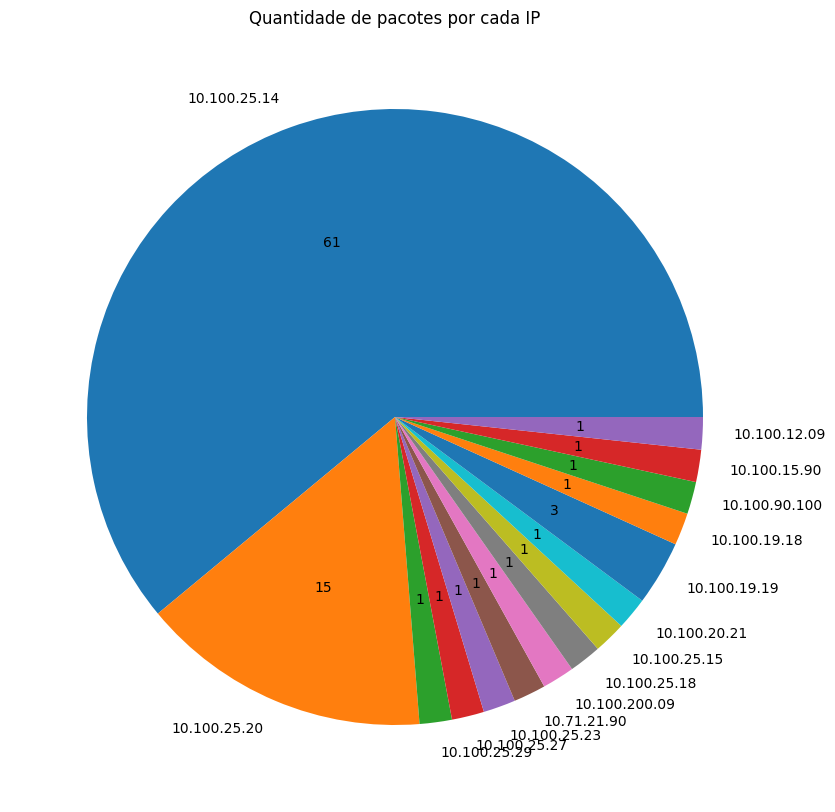

In [113]:
ip_suspeito = [] #se o mesmo ip se repetir varias vezes colocamos em ip_suspeito,indice de brute force
ip_safe = []
con = []

for d in data['Source']:
    con.append(d)    
# Contar a frequência dos IPs suspeitos e seguros

freq_suspeito = [counter[ip] for ip in ip_suspeito]
freq_seguros = [counter[ip] for ip in ip_safe]
ip_counts = {}

# Contando as ocorrências de cada IP
for ip in y_pred:
    if ip in ip_counts:
        ip_counts[ip] += 1
    else:
        ip_counts[ip] = 1

# Classificando os IPs como suspeitos ou seguros
for ip, count in ip_counts.items():
    if count > 1:  # Se o IP aparece mais de uma vez, é considerado suspeito
        ip_suspeito.append(ip)
    else:
        ip_safe.append(ip)

#frequencia de conecção por cada lista de categoria
contagem = 0
discard = 0
for end in ip_suspeito:
    for end2 in con:
        if end == end2:
            contagem += 1
        else:
            discard += 1

print("IP's Suspeitos:{}".format(ip_suspeito))
print("IP's Safe:{}".format(ip_safe)) 

qtd = Counter(con)
end_ip = list(qtd.keys())
end_freq = list(qtd.values())

fig, ax = plt.subplots(figsize=(15, 10))
ax.pie(end_freq, labels=end_ip,autopct='%d')
ax.set_title('Quantidade de pacotes por cada IP')

plt.show()


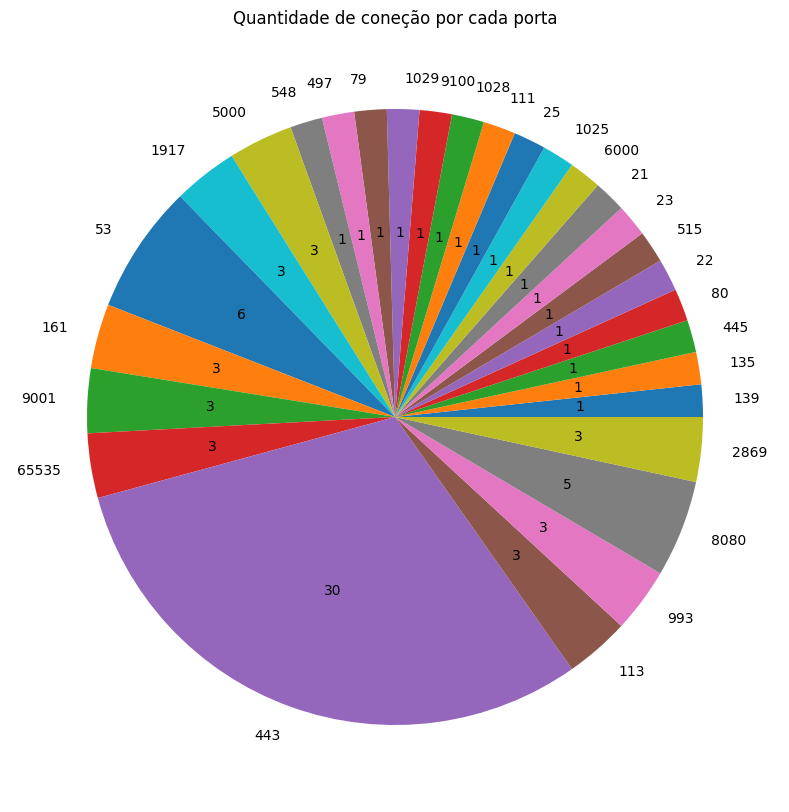

In [99]:
portas = []

for pt in data['Destine_port']:
    portas.append(pt)

ocorrencias = Counter(portas)

# Obter as portas e as contagens correspondentes
porta = list(ocorrencias.keys())
contagens = list(ocorrencias.values())

fig, ax = plt.subplots(figsize=(15, 10))
ax.pie(contagens, labels=porta,autopct='%d')
ax.set_title('Quantidade de coneção por cada porta')
plt.show()
